# LGBM & XGBM

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, classification_report,confusion_matrix
import lightgbm as lgb
import xgboost as xgb


In [41]:
df = pd.read_csv('diabetes.csv')

In [42]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


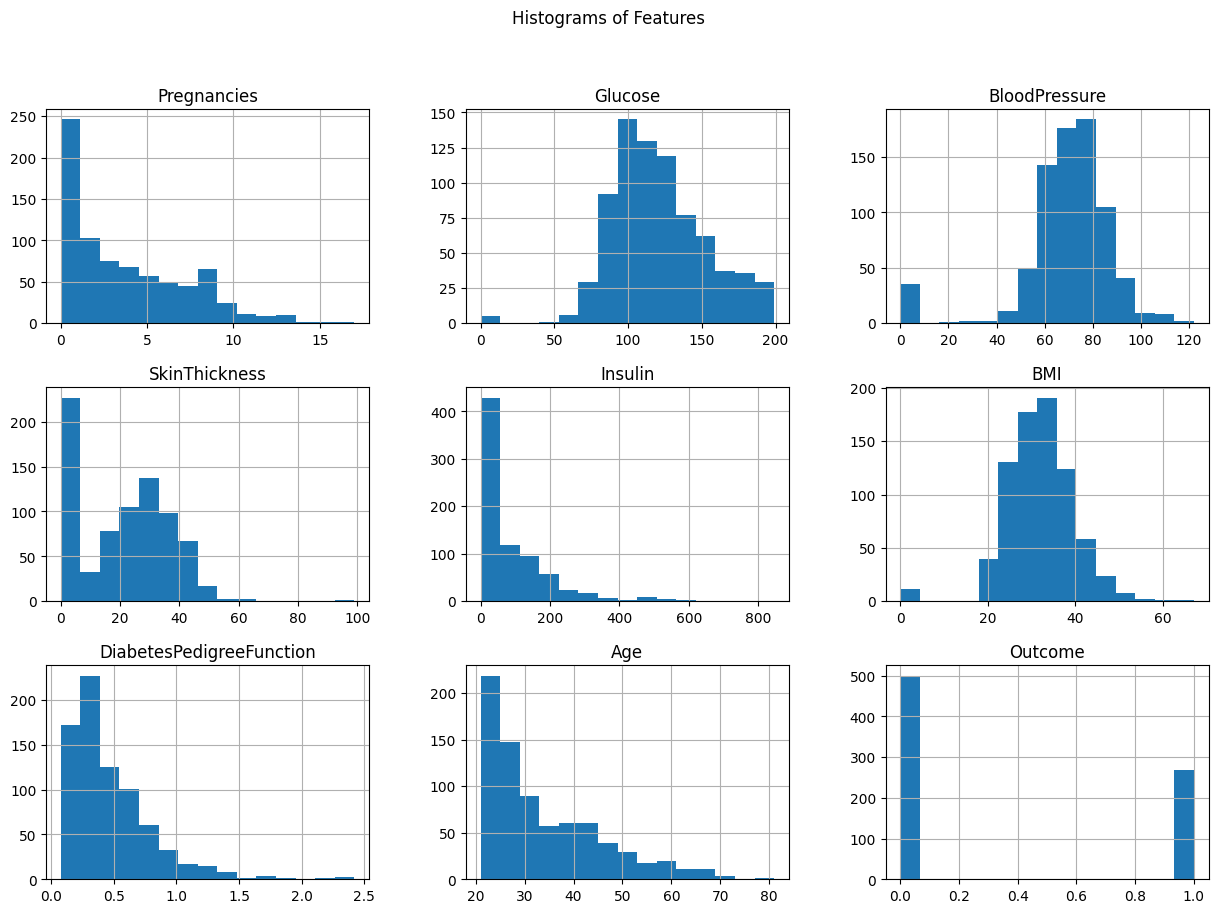

In [44]:
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()


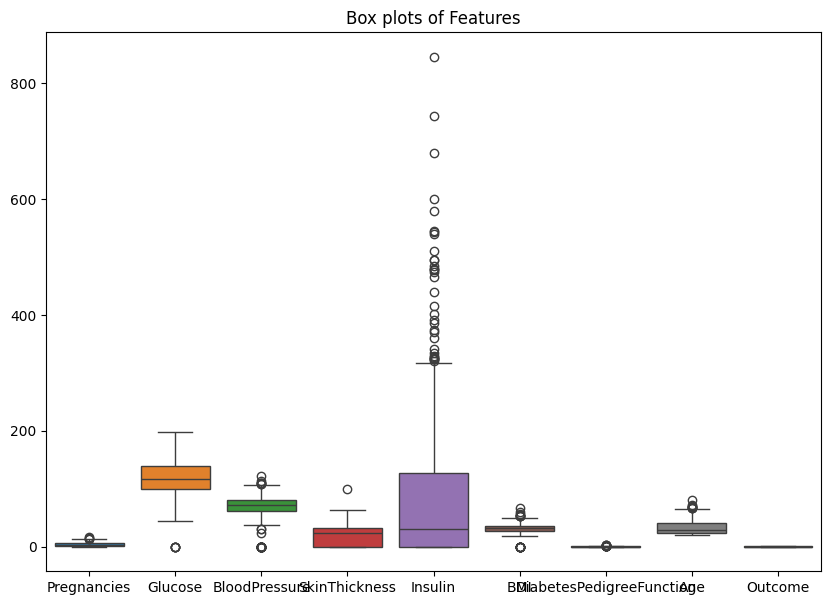

In [45]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df)
plt.title('Box plots of Features')
plt.show()

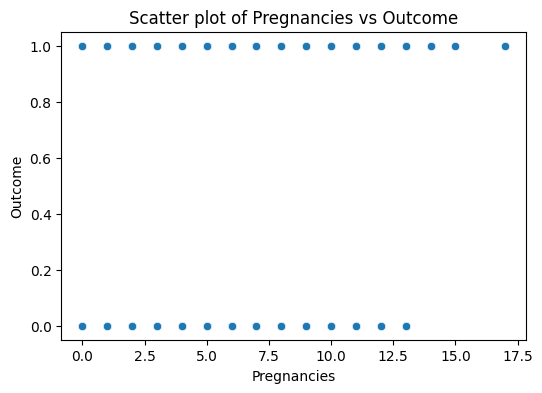

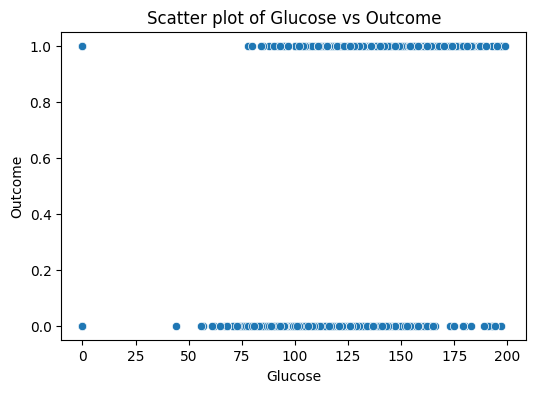

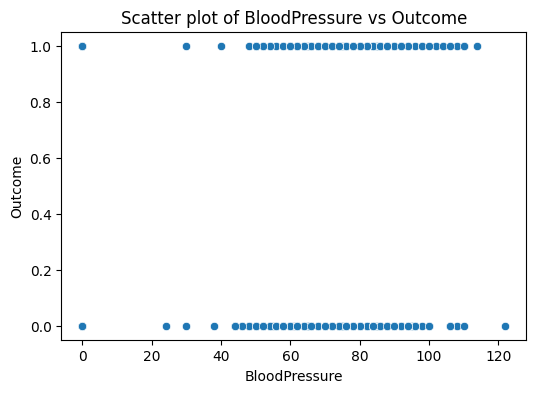

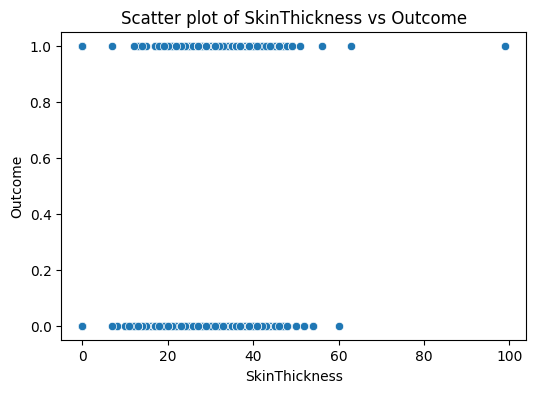

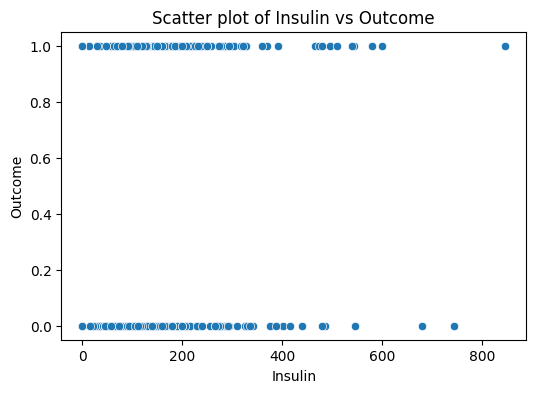

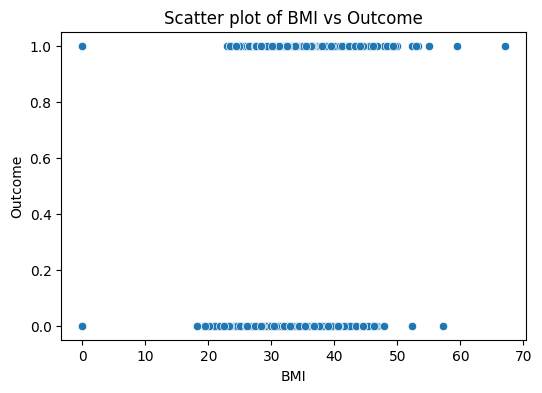

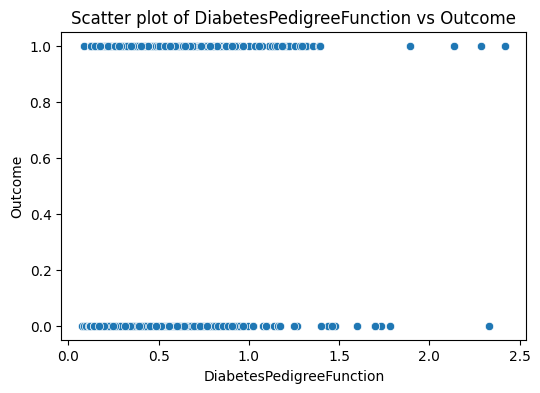

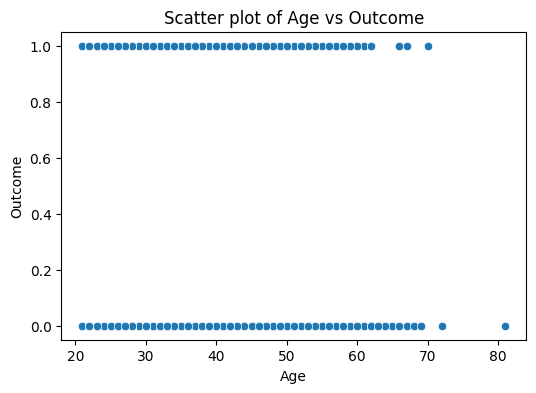

In [46]:
features = df.columns.drop('Outcome')
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['Outcome'])
    plt.title(f'Scatter plot of {feature} vs Outcome')
    plt.show()

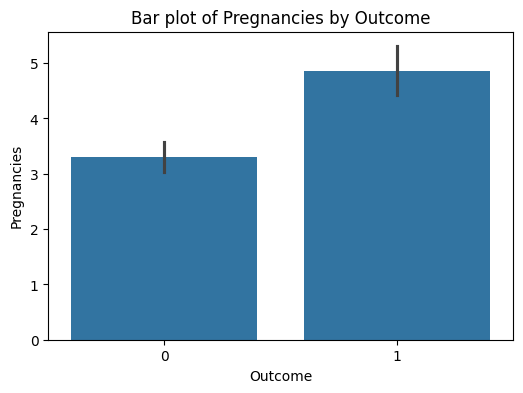

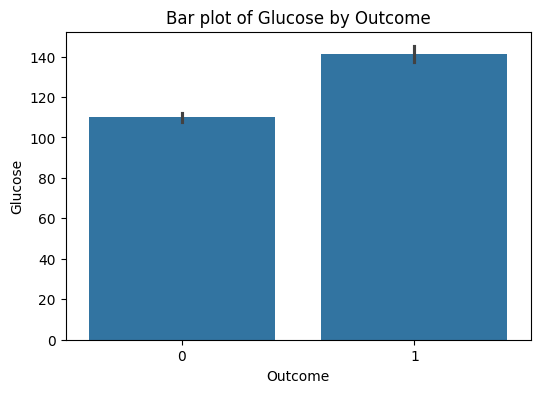

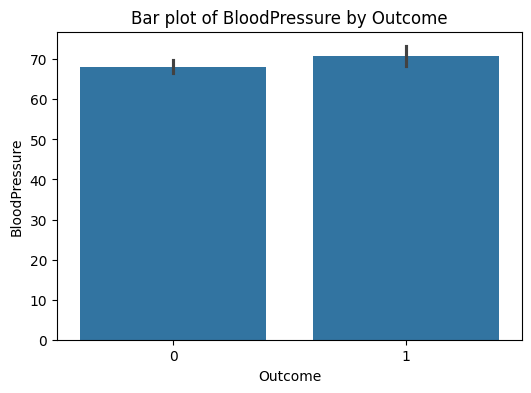

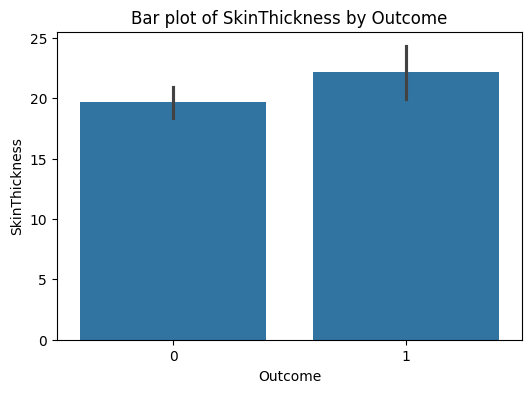

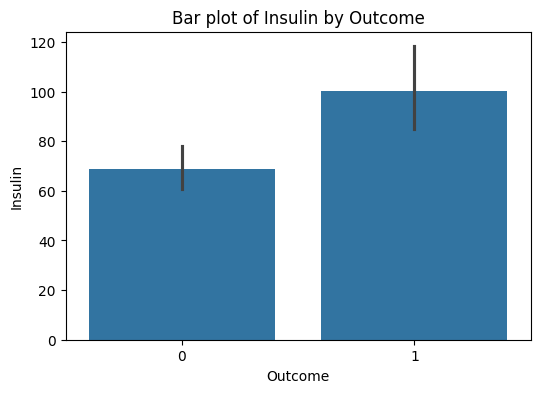

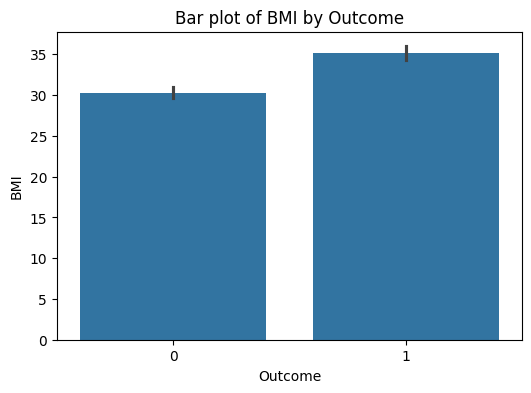

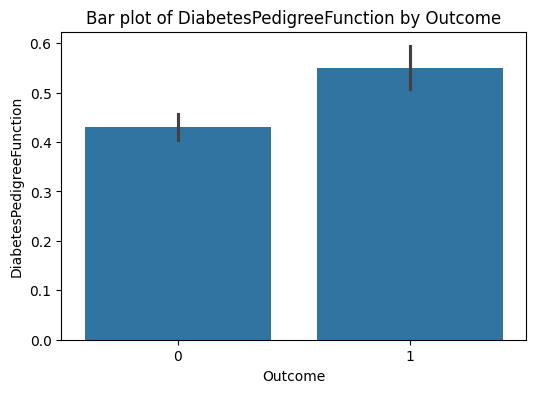

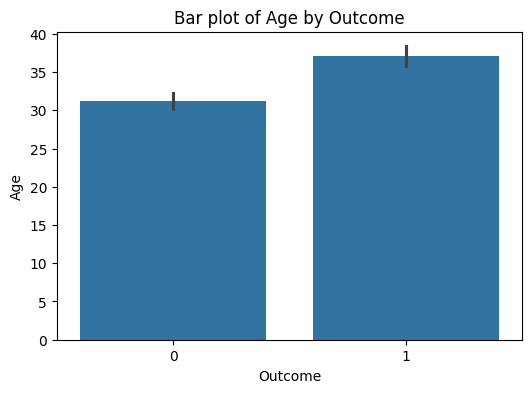

In [47]:
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Outcome', y=feature, data=df)
    plt.title(f'Bar plot of {feature} by Outcome')
    plt.show()

In [48]:
df_encoded = df.copy()
scaler = StandardScaler()
features = df_encoded.columns.drop('Outcome')
df_encoded[features] = scaler.fit_transform(df_encoded[features])

In [49]:
print(df_encoded.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  


In [50]:
X = df_encoded.drop('Outcome', axis=1)
y = df_encoded['Outcome']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [52]:
# 2. Build and train LightGBM model
lgbm_model = lgb.LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_preds = lgbm_model.predict(X_test)




[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [53]:
print("LightGBM Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, lgbm_preds))
print("ROC-AUC:", roc_auc_score(y_test, lgbm_preds))

LightGBM Evaluation Metrics:
Accuracy: 0.7597402597402597
ROC-AUC: 0.7255555555555555


In [54]:
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:05:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [55]:
print("\nXGBoost Evaluation Metrics:")
print("Precision:", precision_score(y_test, xgb_preds))
print("Recall:", recall_score(y_test, xgb_preds))
print("F1-Score:", f1_score(y_test, xgb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))


XGBoost Evaluation Metrics:
Precision: 0.6226415094339622
Recall: 0.6111111111111112
F1-Score: 0.616822429906542
Confusion Matrix:
 [[80 20]
 [21 33]]


In [56]:
param_grid_lgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}
grid_lgb = GridSearchCV(lgb.LGBMClassifier(random_state=42), param_grid_lgb, cv=3, scoring='roc_auc')
grid_lgb.fit(X_train, y_train)
print("\nLightGBM Best Parameters:", grid_lgb.best_params_)
lgbm_best = grid_lgb.best_estimator_
lgbm_best_preds = lgbm_best.predict(X_test)
print("LightGBM Tuned Accuracy:", accuracy_score(y_test, lgbm_best_preds))
print("LightGBM Tuned ROC-AUC:", roc_auc_score(y_test, lgbm_best_preds))

[LightGBM] [Info] Number of positive: 143, number of negative: 266
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 519
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349633 -> initscore=-0.620652
[LightGBM] [Info] Start training from score -0.620652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [57]:
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}
grid_xgb = GridSearchCV(xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                        param_grid_xgb, cv=3, scoring='f1')
grid_xgb.fit(X_train, y_train)
print("\nXGBoost Best Parameters:", grid_xgb.best_params_)
xgb_best = grid_xgb.best_estimator_
xgb_best_preds = xgb_best.predict(X_test)
print("XGBoost Tuned Precision:", precision_score(y_test, xgb_best_preds))
print("XGBoost Tuned Recall:", recall_score(y_test, xgb_best_preds))
print("XGBoost Tuned F1-Score:", f1_score(y_test, xgb_best_preds))
print("XGBoost Tuned Confusion Matrix:\n", confusion_matrix(y_test, xgb_best_preds))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:05:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:05:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:05:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:05:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:05:28] WARNING: /w


XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
XGBoost Tuned Precision: 0.6956521739130435
XGBoost Tuned Recall: 0.5925925925925926
XGBoost Tuned F1-Score: 0.64
XGBoost Tuned Confusion Matrix:
 [[86 14]
 [22 32]]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:05:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:05:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


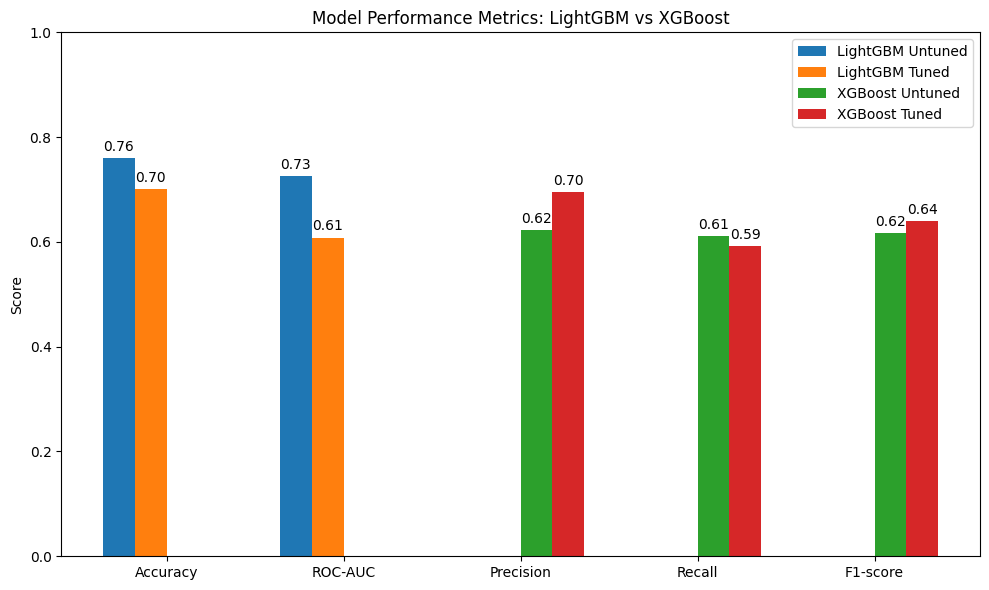

In [58]:
metrics_dict = {
    'LightGBM Untuned': {
        'Accuracy': accuracy_score(y_test, lgbm_preds),
        'ROC-AUC': roc_auc_score(y_test, lgbm_preds),
        'Precision': None,
        'Recall': None,
        'F1-score': None
    },
    'LightGBM Tuned': {
        'Accuracy': accuracy_score(y_test, lgbm_best_preds),
        'ROC-AUC': roc_auc_score(y_test, lgbm_best_preds),
        'Precision': None,
        'Recall': None,
        'F1-score': None
    },
    'XGBoost Untuned': {
        'Accuracy': None,
        'ROC-AUC': None,
        'Precision': precision_score(y_test, xgb_preds),
        'Recall': recall_score(y_test, xgb_preds),
        'F1-score': f1_score(y_test, xgb_preds)
    },
    'XGBoost Tuned': {
        'Accuracy': None,
        'ROC-AUC': None,
        'Precision': precision_score(y_test, xgb_best_preds),
        'Recall': recall_score(y_test, xgb_best_preds),
        'F1-score': f1_score(y_test, xgb_best_preds)
    }
}

metrics = ['Accuracy', 'ROC-AUC', 'Precision', 'Recall', 'F1-score']
labels = metrics
model_names = list(metrics_dict.keys())

data = []
for metric in metrics:
    data.append([metrics_dict[model][metric] if metrics_dict[model][metric] is not None else 0 for model in model_names])

x = np.arange(len(labels))
width = 0.18

fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(model_names):
    ax.bar(x + (i - 1.5) * width, [data[j][i] for j in range(len(labels))], width, label=model)

ax.set_ylabel('Score')
ax.set_title('Model Performance Metrics: LightGBM vs XGBoost')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.ylim(0, 1.0)

# Annotate bar values
for i, model in enumerate(model_names):
    for j in range(len(labels)):
        v = data[j][i]
        if v > 0:
            ax.annotate(f'{v:.2f}',
                        xy=(x[j] + (i - 1.5) * width, v),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')
plt.tight_layout()
plt.show()


# LightGBM
 **Strengths:**

 Higher accuracy and ROC-AUC scores in both untuned and tuned versions compared to XGBoost’s metrics, indicating LightGBM’s overall stronger ability to correctly classify both positive and negative classes and to achieve better class separation.

Default parameters perform well: Untuned LightGBM gives the highest scores for accuracy (0.76) and ROC-AUC (0.73), making it robust with minimal tuning.

**Weaknesses:**

Drops after tuning: Both accuracy and ROC-AUC decrease slightly when tuned, suggesting LightGBM can be sensitive to hyperparameter settings, and careless tuning might degrade its performance.

No precision/recall/F1 reported: The current evaluation does not showcase LightGBM’s performance on positive class identification (precision/recall), which could hide class imbalance issues

# XGBoost
**Strengths:**

Improved positive class metrics after tuning: Tuned XGBoost shows the best precision (0.70) and F1-score (0.64) among all, indicating improved identification of positive cases and a good balance between precision and recall after hyperparameter optimization.

Consistent recall and F1-score: XGBoost maintains similar recall (about 0.61 untuned, 0.59 tuned) and improves F1-score from 0.62 to 0.64 after tuning.

**Weaknesses:**

Lower recall post-tuning: Although tuned precision increases, recall decreases, meaning more false negatives (missed positive cases) after tuning.

No accuracy or ROC-AUC reported: Direct comparison on binary separation and overall correctness is missing for XGBoost (not calculated in your comparison), so a full comparison is incomplete unless these are added later.

# Comparative Analysis Report: LightGBM vs XGBoost for Diabetes Prediction

LightGBM (untuned) achieved higher accuracy (0.76) and ROC-AUC (0.73), making it a strong choice for overall correct predictions and class separation. After tuning, LightGBM's metrics dropped slightly (accuracy 0.70, ROC-AUC 0.61).

XGBoost, after tuning, achieved higher precision (0.70) and F1-score (0.64) compared to its untuned version (precision 0.62, F1-score 0.62). However, recall was slightly higher in the untuned model (0.61) than the tuned model (0.59).

# *LightGBM performed better for overall accuracy and class separation without parameter tuning, while XGBoost (tuned) was better at correctly identifying positive cases (higher precision and F1-score). Choose LightGBM if accuracy is critical, and XGBoost if identifying positives with fewer false positives is more important.*